# How to detect cadence from pedaling

- Pedaling is a rotation => sinusoid
- Cadence vary during pedaling => frequency changes

=> Use FFT to detect the mean frequency during x seconds

## FFT

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0

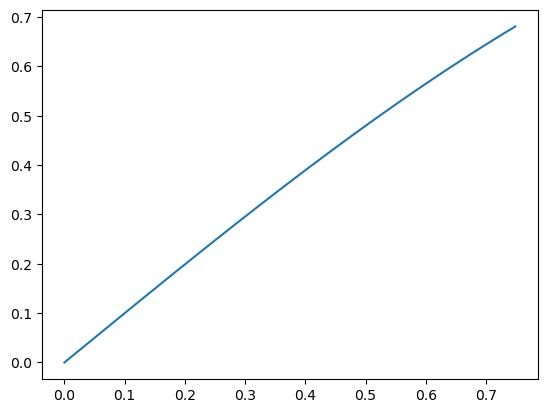

In [65]:
x = np.arange(0,2*np.pi,1/N)   # start,stop,step
# x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [66]:
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

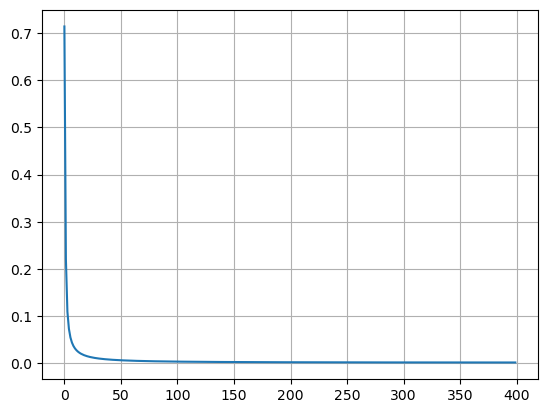

In [67]:

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [68]:
# Compute the discrete Fourier Transform of the amplitude data using 'fft()'.
# The fft function outputs a vector of complex numbers.
from scipy.fft import fft
fftY = fft(y)
if 0:
    fftY

In [69]:
# The magnitude of the fft can be calculated by adding the squares of the
# real and imaginary components (and then taking the square root).  The
# tangent of the phase is determined by the ratio of the imaginary and real parts.
# NumPy has built-in functions 'np.abs()' and 'np.angle()' that can be used
# to calculate these quantities directly.
N = len(fftY)
mag = np.abs(fftY)
phase = np.angle(fftY)

In [70]:
# We have to determine the appropriate frequency scale for the x-axis.  The
# maximum frequency is set by the spacing between adjacent times.  The
# frequency step, is set by fmax/(number of points - 1).
fmax = 1/(x[1]-x[0])
fstep = fmax/(len(x) - 1)
fmax, fstep

(800.0, 1.335559265442404)

In [71]:
# Therefore the frequency axis is:
freq = np.arange(0, fmax + fstep, fstep)

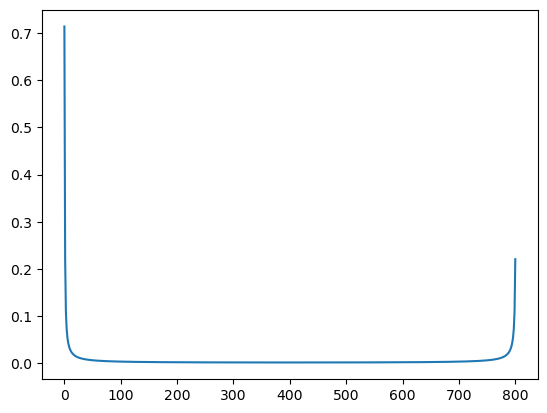

In [72]:
# Below, we plot the magnitude of the fourier transform.  I don't know
# enough about fft to know why, but the magnitude that is output
# is the amplitude of the time signal multiplied by one half the number of
# points.  To get just the amplitude, I will divided the magnitude by N/2
# before plotting.
fft_mag = plt.figure()
plt.plot(freq, mag/(len(x)/2));